In [2]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import torch.utils.data as Data

c:\Users\86189\anaconda3\envs\pythonProject\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas_profiling as ppf
data = pd.read_table('zhengqi_train.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'zhengqi_train.txt'

In [3]:


# 分割训练集和测试集
x = data.iloc[50:, :-1].values
y = data.iloc[50:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# 数据标准化
ss = preprocessing.StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# numpy转tensor
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float().view(-1,1)
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float().view(-1,1)

# batch_size = 64
torch_dataset = Data.TensorDataset(x_train, y_train) 
loader = Data.DataLoader(dataset=torch_dataset, batch_size=64, 
            shuffle=True) 

# print(next(iter(loader)))


In [4]:
class LR(nn.Module):

    def __init__(self):
        super(LR, self).__init__()
        self.fc1 = nn.Linear(38, 48)
        self.fc2 = nn.Linear(48, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 8)
        self.fc5 = nn.Linear(8, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [5]:
# 模型初始化
net = LR()
criterion = nn.MSELoss()
optm = torch.optim.Adam(net.parameters(), lr=0.0001, weight_decay=0.01)
epochs = 300


In [6]:
epochs_list=[]
train_loss_list=[]
test_error_list=[]
for e in range(epochs):
    epochs_list.append(e)
    for i, (batch_x, batch_y) in enumerate(loader):
        y_hat = net(batch_x)
#         print(y_hat.shape)
        loss = criterion(y_hat, batch_y)
        optm.zero_grad()
        loss.backward()
        optm.step()
    
    y = net(x_train)
    loss = criterion(y, y_train)
    train_loss_list.append(loss.item())
    y_pred = net(x_test)
    error = criterion(y_pred, y_test)
    test_error_list.append(error.item())
    if (e+1)%50==0:
        print("Epoch:{}, trainLoss:{}，testLoss:{}".format(e+1,loss.item(),error.item()))
    

Epoch:50, trainLoss:0.10798513144254684，testLoss:0.1259404867887497
Epoch:100, trainLoss:0.09465957432985306，testLoss:0.11724711209535599
Epoch:150, trainLoss:0.08794468641281128，testLoss:0.11426088958978653
Epoch:200, trainLoss:0.08372967690229416，testLoss:0.11319550126791
Epoch:250, trainLoss:0.0802350714802742，testLoss:0.11196142435073853
Epoch:300, trainLoss:0.0776086077094078，testLoss:0.11262156814336777


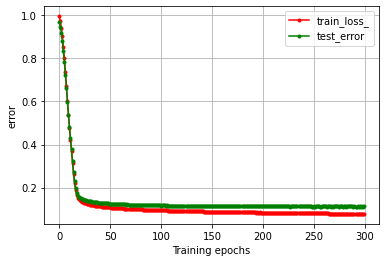

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Training epochs")
plt.ylabel("error")
plt.grid()
plt.plot(epochs_list, train_loss_list, '.-', color="r",
                label="train_loss_")
plt.plot(epochs_list, test_error_list, '.-', color="g",
                label="test_error")

plt.legend(loc="best")
